In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
import numpy as np
import PIL

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import joblib

In [2]:
dataset = Path('../Rice_Image_Dataset')

image_count = 0

for subdir in dataset.iterdir():
    if subdir.is_dir():
        c = sum(1 for x in subdir.glob('*') if x.is_file())
        image_count += c
        print(f'{str(subdir).split('/')[2]}: \t{c} images')

print(f'\n{image_count} images in total')

Arborio: 	15000 images
Basmati: 	15000 images
Ipsala: 	15000 images
Jasmine: 	15000 images
Karacadag: 	15000 images

75000 images in total


Image size: (250, 250)


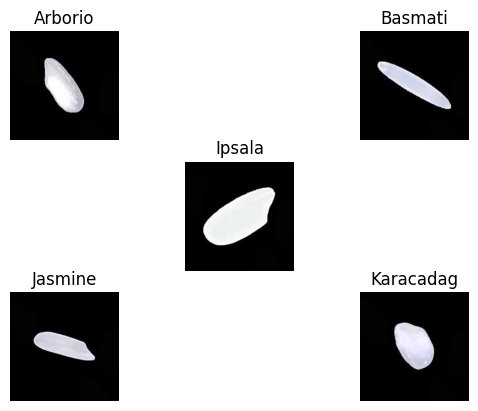

In [3]:
arborio = list(dataset.glob('Arborio/*'))
basmati = list(dataset.glob('Basmati/*'))
ipsala = list(dataset.glob('Ipsala/*'))
jasmine = list(dataset.glob('Jasmine/*'))
karacadag = list(dataset.glob('Karacadag/*'))

plt.subplot(3, 3, 1)
with PIL.Image.open(str(arborio[1])) as img:
    plt.imshow(img)
    print(f'Image size: {img.size}')
plt.axis('off')
plt.title('Arborio')

plt.subplot(3, 3, 3)
with PIL.Image.open(str(basmati[1])) as img:
    plt.imshow(img)
plt.axis('off')
plt.title('Basmati')

plt.subplot(3, 3, 5)
with PIL.Image.open(str(ipsala[1])) as img:
    plt.imshow(img)
plt.axis('off')
plt.title('Ipsala')

plt.subplot(3, 3, 7)
with PIL.Image.open(str(jasmine[1])) as img:
    plt.imshow(img)
plt.axis('off')
plt.title('Jasmine')

plt.subplot(3, 3, 9)
with PIL.Image.open(str(karacadag[1])) as img:
    plt.imshow(img)
plt.axis('off')
plt.title('Karacadag')

plt.show()

In [4]:
raw_images = []
labels = []

SIZE = 1000

for path in arborio[:SIZE] + basmati[:SIZE] + ipsala[:SIZE] + jasmine[:SIZE] + karacadag[:SIZE]:
    with PIL.Image.open(str(path)).convert('L') as img:
        raw_image = np.array(img.getdata()).flatten()
        label = str(path).split('/')[2]
        raw_images.append(raw_image)
        labels.append(label)

X = np.array(raw_images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,111))

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(acc)

0.972


Using KNN algorithm on a small portion of the dataset already obtains quite high accuracy.

In [5]:
with PIL.Image.open(str(karacadag[4000])).convert('L') as img:
    raw_image = np.array([np.array(img.getdata()).flatten()])
    prediction = clf.predict(raw_image)
    print(prediction)

['Karacadag']


Here I realized that in order to process the entire dataset I would have to do it in batches.

In [6]:
joblib.dump(clf, './objects/knn.pkl')

['./objects/knn.pkl']